 # Classificação KNN

O KNN é um dos algoritmos mais simples para Machine Learning, sendo um algoritmo do tipo "lazy", ou seja, nenhuma computação é realizada no dataset até que um novo ponto de dado seja alvo de teste.

criar um modelo preditivo usando KNN que, dadas as características do vinho, será capaz de classificar a qualidade do vinho, a partir do aprendizado obtido no treinamento do algoritmo

Classificação KNN em Python - Definindo Um Problema Para Classificação Multiclasse

## Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 1000

## Carregando e Explorando o Dataset

In [5]:
data_frame = pd.read_csv('winequality-red.csv', sep=';')

In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data_frame.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data_frame.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

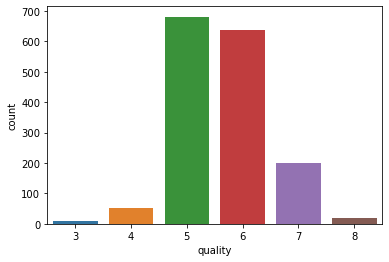

In [9]:
sns.countplot(x = data_frame['quality']);

<AxesSubplot:>

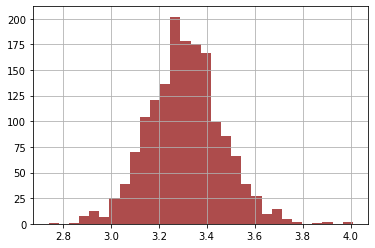

In [10]:
data_frame['pH'].hist(bins=30,color='darkred',alpha=0.7)

## Pré-Processamento e Normalização

In [15]:
x_wine = data_frame.drop('quality', axis=1).values
y_wine = data_frame['quality'].values

In [16]:
x_wine.shape, y_wine.shape

((1599, 11), (1599,))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_wine = scaler.fit_transform(x_wine)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size = 0.30, random_state = 101)

In [20]:
x_train, k_data, y_train, k_labels = train_test_split(x_train, y_train, test_size=0.1, random_state=84)

In [21]:
print("Exemplos de Treino: {}".format(len(x_train)))
print("Exemplos de Validação: {}".format(len(k_data)))
print("Exemplos de Teste: {}".format(len(x_test)))

Exemplos de Treino: 1007
Exemplos de Validação: 112
Exemplos de Teste: 480


## Testando o Melhor Valor de K

In [22]:
k_vals = range(1, 30, 2)
accuracies = []

In [24]:
from sklearn.neighbors import KNeighborsClassifier
for k in k_vals:
    
    # Treinando o modelo KNN com cada valor de k
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_train, y_train)
          
    # Avaliando o modelo e atualizando a lista de acurácias
    score = knn_model.score(k_data, k_labels)
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    accuracies.append(score)

Com valor de k = 1, a acurácia é = 64.29%
Com valor de k = 3, a acurácia é = 63.39%
Com valor de k = 5, a acurácia é = 58.04%
Com valor de k = 7, a acurácia é = 58.93%
Com valor de k = 9, a acurácia é = 65.18%
Com valor de k = 11, a acurácia é = 62.50%
Com valor de k = 13, a acurácia é = 62.50%
Com valor de k = 15, a acurácia é = 60.71%
Com valor de k = 17, a acurácia é = 60.71%
Com valor de k = 19, a acurácia é = 61.61%
Com valor de k = 21, a acurácia é = 59.82%
Com valor de k = 23, a acurácia é = 61.61%
Com valor de k = 25, a acurácia é = 62.50%
Com valor de k = 27, a acurácia é = 60.71%
Com valor de k = 29, a acurácia é = 61.61%


In [25]:
i = np.argmax(accuracies)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (k_vals[i], accuracies[i] * 100))

O valor de k = 9 alcançou a mais alta acurácia de 65.18% nos dados de validação!


In [26]:
k = k_vals[i]

## Construção e Treinamento do Modelo KNN

In [30]:
model = KNeighborsClassifier(k)

In [31]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

## Previsões com Dados de Teste e Avaliação do Modelo

In [32]:
predictions = model.predict(x_test)

In [33]:
from sklearn.metrics import classification_report
print("Avaliação do Modelo nos Dados de Teste")
print(classification_report(y_test, predictions))

Avaliação do Modelo nos Dados de Teste
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        19
           5       0.67      0.68      0.67       208
           6       0.50      0.57      0.53       180
           7       0.40      0.37      0.38        63
           8       0.00      0.00      0.00         5

    accuracy                           0.55       480
   macro avg       0.26      0.27      0.26       480
weighted avg       0.53      0.55      0.54       480



/home/raphael/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raphael/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raphael/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[  0,   1,   3,   1,   0,   0],
       [  0,   0,  12,   6,   1,   0],
       [  0,   5, 141,  57,   5,   0],
       [  0,   1,  49, 102,  28,   0],
       [  0,   0,   7,  33,  23,   0],
       [  0,   0,   0,   4,   1,   0]])

/home/raphael/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/raphael/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Matriz de Confusão, sem normalização
[[  0   1   3   1   0   0]
 [  0   0  12   6   1   0]
 [  0   5 141  57   5   0]
 [  0   1  49 102  28   0]
 [  0   0   7  33  23   0]
 [  0   0   0   4   1   0]]
Normalizada
[[0.         0.2        0.6        0.2        0.         0.        ]
 [0.         0.         0.63157895 0.31578947 0.05263158 0.        ]
 [0.         0.02403846 0.67788462 0.27403846 0.02403846 0.        ]
 [0.         0.00555556 0.27222222 0.56666667 0.15555556 0.        ]
 [0.         0.         0.11111111 0.52380952 0.36507937 0.        ]
 [0.         0.         0.         0.8        0.2        0.        ]]


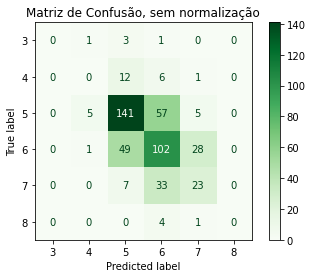

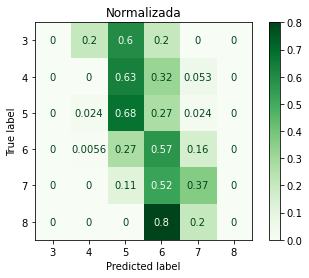

In [37]:
titles_options = [("Matriz de Confusão, sem normalização", None),
                  ("Normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Greens, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()